In [30]:
#Import reqs
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


# Data Ingestion

In [5]:
df = pd.read_csv("src/honeyproduction.csv")

In [6]:
df.head(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [7]:
#groupby total production per year
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

In [16]:
#Create X column for Linear Regression
X = prod_per_year['year']

X = X.values.reshape(-1, 1)

print(X[:5])

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]]


In [21]:
#Create y column for Linear Regression
y = prod_per_year['totalprod']

print(y[:5])

0    5.105093e+06
1    4.706674e+06
2    5.106000e+06
3    4.221545e+06
4    3.892386e+06
Name: totalprod, dtype: float64


In [34]:
#Fit model
regr = linear_model.LinearRegression()

regr.fit(X, y)
print(f'The coef of the model: {regr.coef_}')
print(f'The intercept of the model: {regr.intercept_}')


The coef of the model: [-88303.18915238]
The intercept of the model: 181208083.10732982


In [35]:
#Making predictions 
honey_preds = regr.predict(X)

In [44]:
#Make a prediction for 2050

year_2050 = np.array(range(2013, 2050))
X_future = year_2050.reshape(-1, 1)

future_predict = regr.predict(X_future)

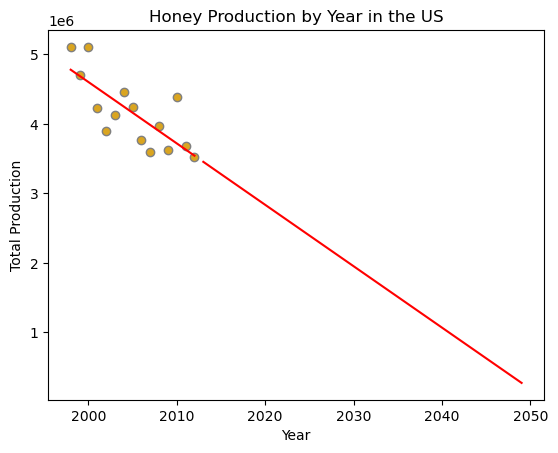

In [47]:
# Scatter plot for existing data
plt.scatter(X, y, c='#DAA520', edgecolor='grey')

# Line plot for predictions
plt.plot(X, honey_preds, c='red')

#Line plot for 2050 predictions
plt.plot(X_future, future_predict, c='red')

plt.title('Honey Production by Year in the US')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.show()